# **EDA dan NLP : Eksplorasi Fitur Review dan Rating Perusahaan Starbucks**
# **Pendahuluan**

Dalam era digital yang penuh dengan informasi dan persaingan yang ketat di industri perhotelan, pemahaman yang mendalam tentang kepuasan pelanggan adalah kunci untuk kelangsungan bisnis. Sebagai salah satu merek terkemuka di dunia, Starbucks terus berkomitmen untuk memberikan pengalaman pelanggan yang tak terlupakan melalui produk kopi berkualitas tinggi dan suasana yang nyaman.

Keputusan bisnis yang dilakukan oleh Starbucks dalam memenuhi ekspektasi pelanggan dapat dilihat dari *rating* yang diberikan oleh para konsumen, sebagai respon dalam mengkonsumsi produk tersebut. Layanan *rating* juga biasa digunakan oleh perusahaan untuk menjadi patokan apakah pelanggan puas terhadap produk dan layanan yang diberikan oleh Starbucks itu sendiri.

Proyek ini bertujuan untuk menganalisis data rating yang diberikan oleh pelanggan Starbucks. Penelitian ini menggunakan metode eksplorasi (*Exploratory Daya Analysis*) data dan pemodelan data (*Data Modelling*) untuk mendapatkan wawasan yang berharga dan menemukan pola tentang bagaimana pelanggan merasakan layanan Starbucks. Dalam upaya untuk memahami lebih baik preferensi pelanggan, saya akan menganalisis data rating, mengeksplorasi tren, dan mengidentifikasi faktor-faktor yang mempengaruhi kepuasan pelanggan berdasarkan rating. Proyek ini secara garis besar akan memiliki beberapa tahap, yaitu data cleaning, exploratory data analysis, dan data modeling

Pengenalan fitur-fitur Dataset:
```

Name        : Nama Pemberi Rating

Location    : Lokasi Perusahaan Starbucks

Date	    : Tanggal Rating dan Review

Rating	  : Rating oleh Konsumen

Review	  : Komentar Pelanggan

Image_Links : Link


```



In [ ]:
#Import modul-modul yang diperlukan
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import emoji
import spacy
nlp = spacy.load('en_core_web_sm')

import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier



from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalMaxPooling1D,Embedding,Dense, LSTM

from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('reviews_data.csv')
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


# Data Preprocessing
Tahap-tahap yang dilaukan:


1.   Menghapus *null values*
2.   Menghapus kolom yang tidak relevan
3.   Menambahkan kolom-kolom yang diperlukan berdasrkan informasi dari tabel yang ada
4.   Mengganti nilai rating menjadi data kategorik
5.   Membersikan kolom review agar dapat dipahami model



In [ ]:
#Menghapus kolom Image_Links karena tidak terlalu berguna
df.drop(columns=['Image_Links'], inplace=True)

In [ ]:
#Menghapus missing value pada data
df.dropna(inplace=True)


In [ ]:
#Melihat kembali missing values
df.isna().sum()

name        0
location    0
Date        0
Rating      0
Review      0
dtype: int64

In [ ]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


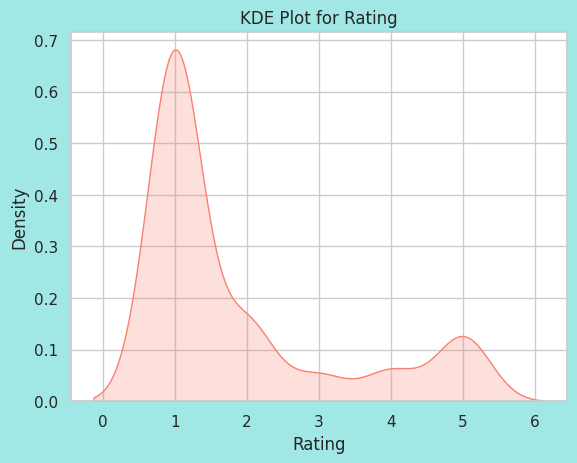

In [ ]:
#Melihat distribusi data pada rating
sns.set(style="whitegrid")

# Buat plot KDE
sns.kdeplot(x='Rating', data=df, fill=True, color='salmon')
fig = plt.gcf()
fig.patch.set_facecolor('#A0E7E5')

# Atur label dan judul
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('KDE Plot for Rating')

# Tampilkan plot
plt.show()

**Interpretasi**:


*   Berdasarkan distribsusi data tersebut, data dengan rating 1 paling dominan.
*   Semakin tinggi nilai rating maka menunjukkan tren positif.
*   Dalam data ini, rating negatif paling banyak diberikan.


In [ ]:
#Mengganti data rating menjadi data kategorikal : Positive, Neutral, Negative
df['Rating'] = df['Rating'].replace([1,2],2)
df['Rating'] = df['Rating'].replace(3,0)
df['Rating'] = df['Rating'].replace([4,5],1)


In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df

In [ ]:
df.Rating.value_counts()

2.0    550
1.0    122
0.0     33
Name: Rating, dtype: int64

Mengganti Nilai Rating Menjadi Kategorik

Nilai 1 dan 2 diganti menjadi nilai 2 (Negatif)

Nilai 3 diganti menjadi nilai 0 (Neutral)

Nilai 4 dan 5 diganti menjadi 1 (Positif)




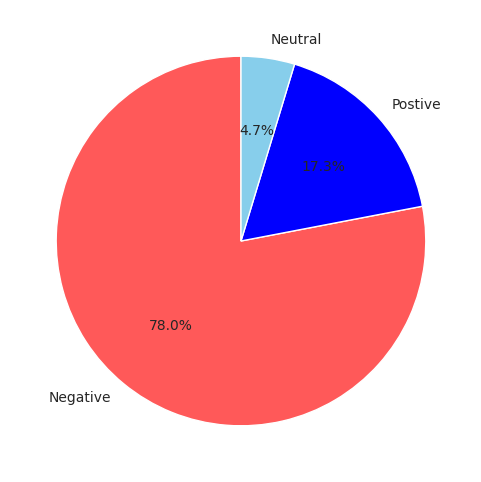

In [ ]:
#Mengganti nilai-nilai rating ke dalam kategorik
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
plt.pie(df.Rating.value_counts(), labels=['Negative', 'Postive','Neutral'], autopct='%1.1f%%',colors=['#FF5959', 'blue', 'Skyblue'] , startangle=90);

In [ ]:
#Mengekestrak lokasi dengan singkatan
df['location'] = df['location'].str.split(',').str[1]

Text(0.5, 1.0, 'Count of Reviews per State')

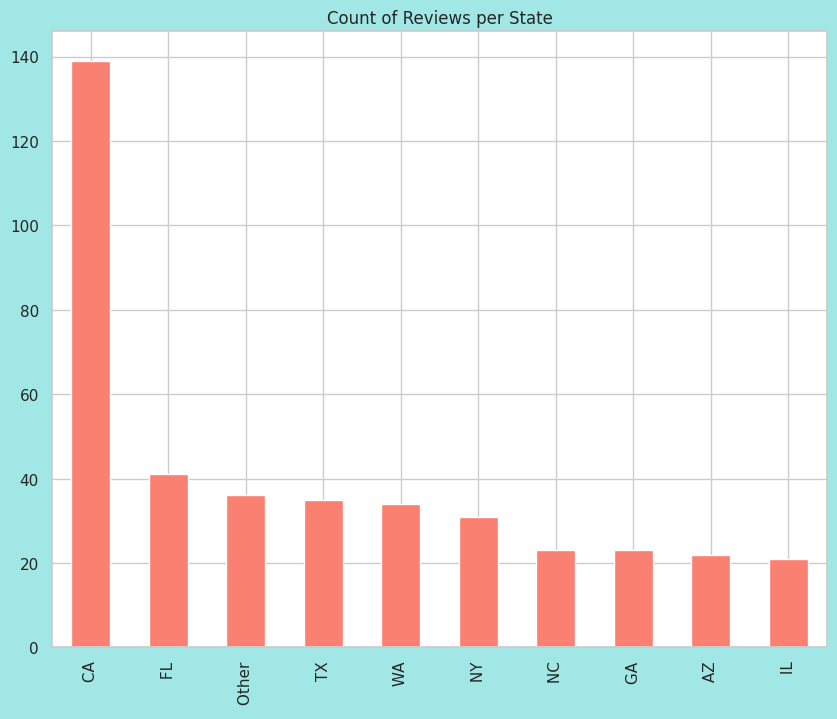

In [ ]:
#Visualisasi kota dengan rating paling banyak
plt.figure(figsize=(10,8))
fig = plt.gcf()
fig.patch.set_facecolor('#A0E7E5')
sns.set_style('whitegrid')
df['location'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='Salmon')
plt.title('Count of Reviews per State')

In [ ]:
df.location.value_counts()

 CA              139
 FL               41
 Other            36
 TX               35
 WA               34
                ... 
 Saskatchewan      1
 NL                1
 Minnesota         1
 Florida           1
 oh                1
Name: location, Length: 82, dtype: int64

In [ ]:
#Membuat dataframe baru dengan kolom location dan rating
data = df[['location','Rating']]
data.head()

,location,Rating
0,TX,1.0
1,FL,1.0
2,PA,1.0
3,WA,1.0
4,OR,1.0


In [ ]:
#Menambahkan kolom baru berdasarkan kategori rating
data['Negative'] = data[data['Rating'] == 2] ['Rating']
data['Positive'] = data[data['Rating'] == 1] ['Rating']
data['Neutral'] = data[data['Rating'] == 0] ['Rating']
data.drop('Rating', axis=1, inplace=True)
data = data.groupby('location').count().sort_values(ascending=False, by='Negative').head(9)

In [ ]:
data

,Negative,Positive,Neutral
location,,,
CA,111,20,8
FL,33,6,2
WA,29,3,2
NY,27,3,1
Other,26,8,2
TX,25,8,2
GA,21,2,0
NC,21,2,0
AZ,17,4,1


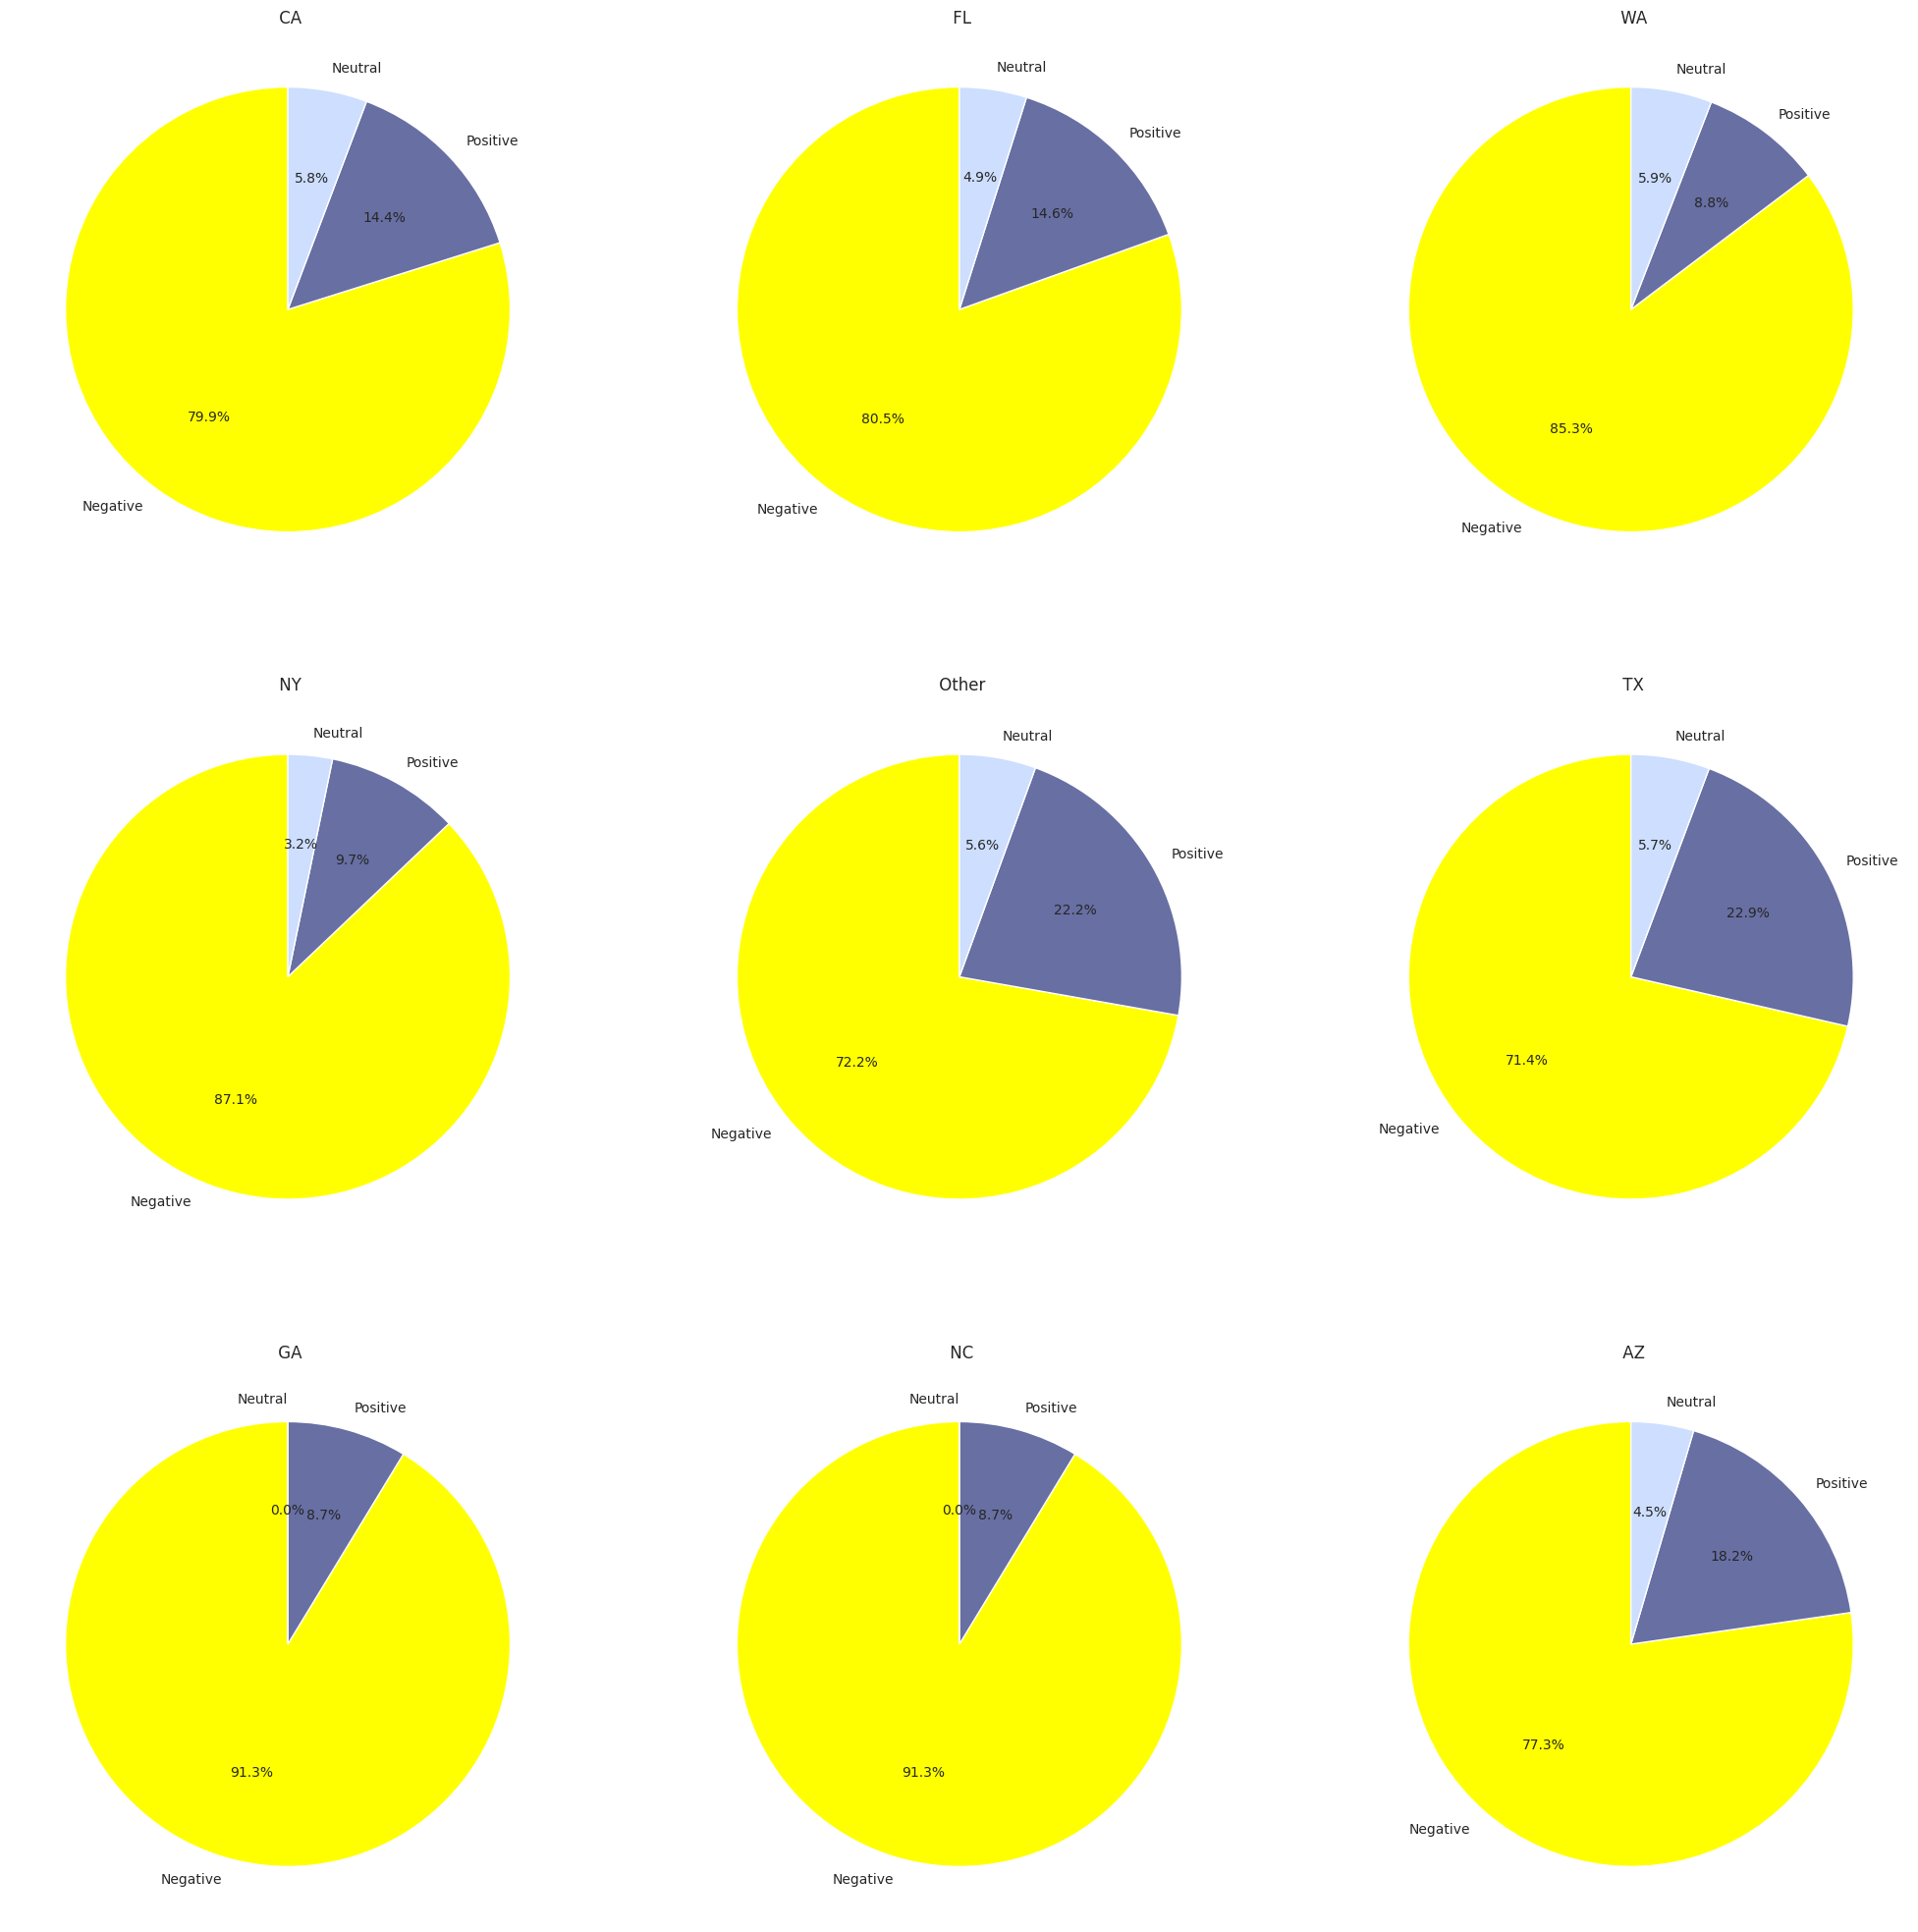

In [ ]:
#Memvisualisasikan data kecenderungan rating dari seluruh kota
fig = plt.figure(figsize=(25,25))
i = 1
features = data.index
for x in features:
    plt.subplot(3, 3, i)
    ax=plt.pie(data.loc[x], labels=data.columns, autopct='%1.1f%%', startangle=90,
        colors=['yellow', '#676FA3','#CDDEFF'])
    plt.title(str(x), loc='center')
    i+=1
plt.show()

**Interpretasi:**


*   Berdasarkan seluruh visualisasi, setiap kota menunjukkan kecenderungan rating ke arah negatif.




In [ ]:
#Mengekstrak data tanggal dari kolom date, dan menambahkan kolom baru berdasarkan tahun, bulan, dan hari
df['Date'] = df['Date'].str.replace('Reviewed', '', case=False, regex=False)
df = df.astype({'Date':'datetime64[ns]'})
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [ ]:
df

,name,location,Date,Rating,Review,Month,Year,DayOfWeek
0,Helen,TX,2023-09-13,1.0,Amber and LaDonna at the Starbucks on Southwes...,9,2023,2
1,Courtney,FL,2023-07-16,1.0,** at the Starbucks by the fire station on 436...,7,2023,6
2,Daynelle,PA,2023-07-05,1.0,I just wanted to go out of my way to recognize...,7,2023,2
3,Taylor,WA,2023-05-26,1.0,Me and my friend were at Starbucks and my card...,5,2023,4
4,Tenessa,OR,2023-01-22,1.0,I’m on this kick of drinking 5 cups of warm wa...,1,2023,6
...,...,...,...,...,...,...,...,...
700,Margaret,CA,2011-10-02,2.0,I ordered Via Starbucks coffee online. I recei...,10,2011,6
701,Ric,ON,2011-08-31,0.0,"My name is Ric **, I am journalist by professi...",8,2011,2
702,Jayne,NY,2011-08-24,2.0,"The bagel was ice cold, not cut and not toasted.",8,2011,2
703,Norma,CA,2011-08-15,2.0,"In the morning of Monday, August 15, 2011, at ...",8,2011,0


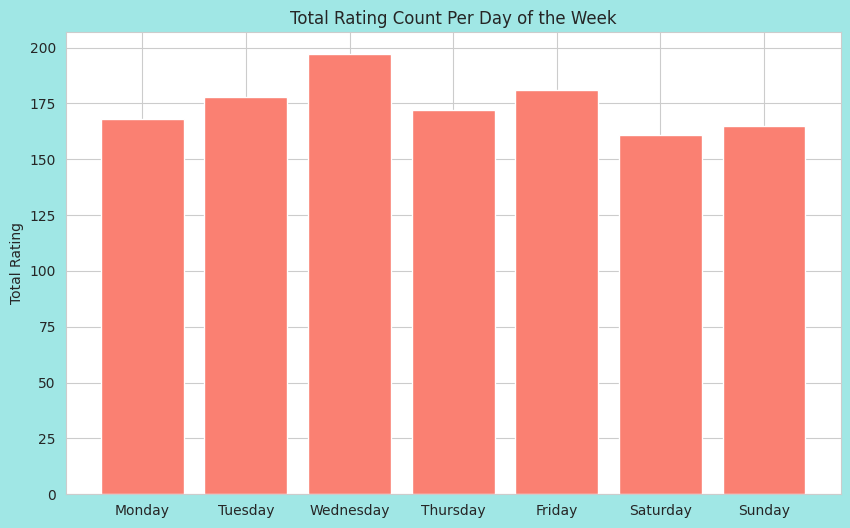

In [ ]:
#Visualisasi rating per hari
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
df_date = df.groupby('DayOfWeek')['Rating'].sum().reset_index()

plt.figure(figsize=(10, 6))
fig = plt.gcf()
fig.patch.set_facecolor('#A0E7E5')
plt.bar(df_date['DayOfWeek'], df_date['Rating'], color='Salmon')
plt.ylabel('Total Rating')
plt.title('Total Rating Count Per Day of the Week')
plt.xticks(df_date['DayOfWeek'], labels=day_list);

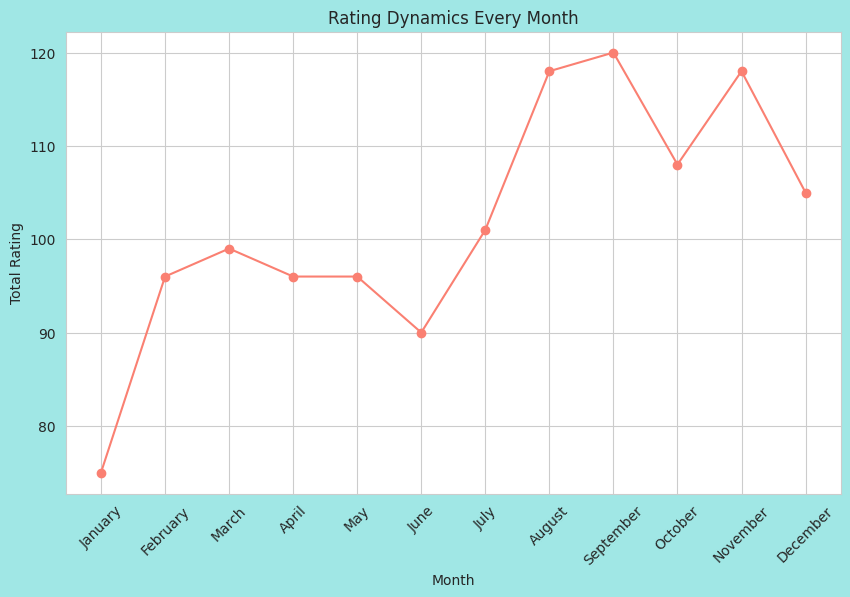

In [ ]:
#Visualisasi total rating per bulan
df_date = df.groupby(['Month'])['Rating'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
fig = plt.gcf()
fig.patch.set_facecolor('#A0E7E5')
plt.plot(df_date['Month'], df_date['Rating'], marker='o', color='Salmon', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Rating')
plt.title('Rating Dynamics Every Month')

plt.xticks(df_date['Month'], labels=month_order,rotation=45)
plt.grid(True)
plt.show()

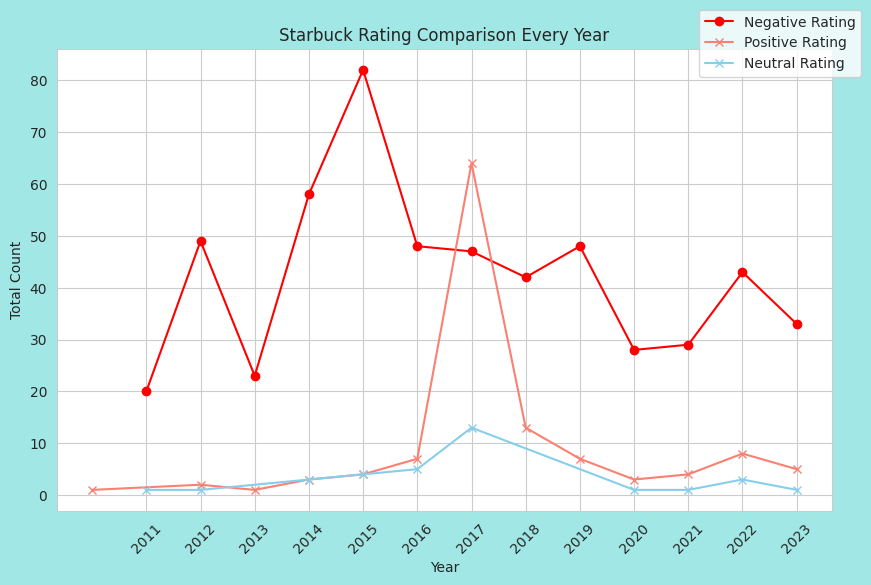

In [ ]:
#Perbandingan rating setiap tahun per kategori
df_date3 = df[df['Rating'] == 2].groupby('Year')['Rating'].count().reset_index()
df_date4 = df[df['Rating'] == 1].groupby('Year')['Rating'].count().reset_index()
df_date5 = df[df['Rating'] == 0].groupby('Year')['Rating'].count().reset_index()



plt.figure(figsize=(10, 6))
fig = plt.gcf()
fig.patch.set_facecolor('#A0E7E5')
plt.plot(df_date3['Year'], df_date3['Rating'], marker='o', color='red', linestyle='-', label='Negative Rating')
plt.plot(df_date4['Year'], df_date4['Rating'], marker='x', color='salmon', linestyle='-', label='Positive Rating')
plt.plot(df_date5['Year'], df_date5['Rating'], marker='x', color='skyblue', linestyle='-', label='Neutral Rating')


plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Starbuck Rating Comparison Every Year')

plt.xticks(df_date3['Year'], labels=df_date3.Year,rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.82, 1.1))
plt.show()

**Interpretasi:**


*   Rating negatif memiliki peningkatan puncak pada tahun 2014 dan 2015
*   Rating positif memuncak pada tahun 2017 dan kemudian menurun di tahun berikutnya.
*   Rating netral cenderung lebih stabil dinamikanya setiap tahun.



In [ ]:
df = df[['Review', 'Rating']]

# Pembersihan data kolom review
Tujuan:

*   Menghapus stemmingwords dan emoji dan non-alpha numeric agar bisa diproses model




In [ ]:
def text_cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text

In [ ]:
df['Review'] = df['Review'].apply(text_cleaning)

In [ ]:
def lemm(df):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(df)):
        lemmed = []
        words = word_tokenize(df['Review'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    df['lemmanized'] = lemmanized
    df['Review'] = df['lemmanized'].apply(' '.join)
    df=df.drop("lemmanized",axis=1)
    return df
df=lemm(df)

In [ ]:
df

,Review,Rating
0,amber and ladonna at the starbucks on southwes...,1.0
1,at the starbucks by the fire station on in alt...,1.0
2,i just wanted to go out of my way to recognize...,1.0
3,me and my friend were at starbucks and my card...,1.0
4,i m on this kick of drinking cup of warm water...,1.0
...,...,...
700,i ordered via starbucks coffee online i receiv...,2.0
701,my name is ric i am journalist by profession i...,0.0
702,the bagel wa ice cold not cut and not toasted,2.0
703,in the morning of monday august at am my co wo...,2.0


# Data Modelling

In [ ]:
x = df['Review']
y = df['Rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
vectorizer_feature = TfidfVectorizer()
x_train_vector = vectorizer_feature.fit_transform(x_train)
x_test_vector = vectorizer_feature.transform(x_test)

In [ ]:
model= LogisticRegression(multi_class="multinomial")
model.fit(x_train_vector,y_train)
preds =model.predict(x_test_vector)

print(accuracy_score(y_test, preds))

0.8014184397163121


In [ ]:
names_of_models=[
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'Support Vector Machine',
    'Naive Bayes',
    'KNeighborsClassifier'
]
models={
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'Support Vector Machine': LinearSVC(),
    'Naive Bayes': MultinomialNB(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [ ]:
accuracies=[]

for name, model in models.items():
    model.fit(x_train_vector, y_train)
    y_pred=model.predict(x_test_vector)

    AS=accuracy_score(y_test, y_pred)
    accuracies.append(AS)

    print(f'Results for {name}')
    print('Accuracy score:', AS)
    print()

Results for LogisticRegression
Accuracy score: 0.8014184397163121

Results for DecisionTreeClassifier
Accuracy score: 0.7872340425531915

Results for RandomForestClassifier
Accuracy score: 0.8226950354609929

Results for Support Vector Machine
Accuracy score: 0.8439716312056738

Results for Naive Bayes
Accuracy score: 0.7304964539007093

Results for KNeighborsClassifier
Accuracy score: 0.8297872340425532



In [ ]:
data1 = pd.DataFrame({'Names': names_of_models, 'Accuracies': accuracies}).sort_values(by=['Accuracies'], ascending=False)

# Reset indeks DataFrame
data1 = data1.reset_index(drop=True)

# Menerapkan background gradient
styled_data1 = data1.style.background_gradient(axis=0, cmap='RdPu')
styled_data1

,Names,Accuracies
0,Support Vector Machine,0.843972
1,KNeighborsClassifier,0.829787
2,RandomForestClassifier,0.822695
3,LogisticRegression,0.801418
4,DecisionTreeClassifier,0.787234
5,Naive Bayes,0.730496


Hasil akurasi:


*   Dari 5 model, SVM memberikan performa terbaik dengan akurasi 84%
*   SVM akan dipilih dari kelima model tersebut
<br><br>
<br><br>

**Model CNN**



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_val_seq = tokenizer.texts_to_sequences(x_test)


X_train_padded = pad_sequences(X_train_seq, maxlen=100, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=100, padding='post')

In [ ]:
model = Sequential([
    Embedding(20001,64,input_length=100,embeddings_regularizer=regularizers.l2(0.0005)),
    Dense(units=128, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=3, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           1280064   
                                                                 
 dense (Dense)               (None, 100, 128)          8320      
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1288771 (4.92 MB)
Trainable params: 1288771 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_val_padded, y_test))


Epoch 1/15
18/18 [==============================] - 2s 42ms/step - loss: 1.2775 - accuracy: 0.7021 - val_loss: 0.9718 - val_accuracy: 0.7305
Epoch 2/15
18/18 [==============================] - 0s 28ms/step - loss: 0.7560 - accuracy: 0.7926 - val_loss: 0.7696 - val_accuracy: 0.7305
Epoch 3/15
18/18 [==============================] - 0s 26ms/step - loss: 0.6108 - accuracy: 0.7926 - val_loss: 0.7238 - val_accuracy: 0.7305
Epoch 4/15
18/18 [==============================] - 0s 24ms/step - loss: 0.5638 - accuracy: 0.7926 - val_loss: 0.6886 - val_accuracy: 0.7305
Epoch 5/15
18/18 [==============================] - 0s 27ms/step - loss: 0.5235 - accuracy: 0.7926 - val_loss: 0.6515 - val_accuracy: 0.7305
Epoch 6/15
18/18 [==============================] - 0s 27ms/step - loss: 0.4824 - accuracy: 0.8138 - val_loss: 0.6156 - val_accuracy: 0.7589
Epoch 7/15
18/18 [==============================] - 0s 26ms/step - loss: 0.4343 - accuracy: 0.8617 - val_loss: 0.5792 - val_accuracy: 0.8085
Epoch 8/15
18

In [ ]:
evaluation_results = model.evaluate(X_val_padded,y_test)
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

5/5 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.8369
Test Loss: 0.5523178577423096
Test Accuracy: 0.8368794322013855


Model CNN menghasilkan akuraasi 83% dibawah model SVM

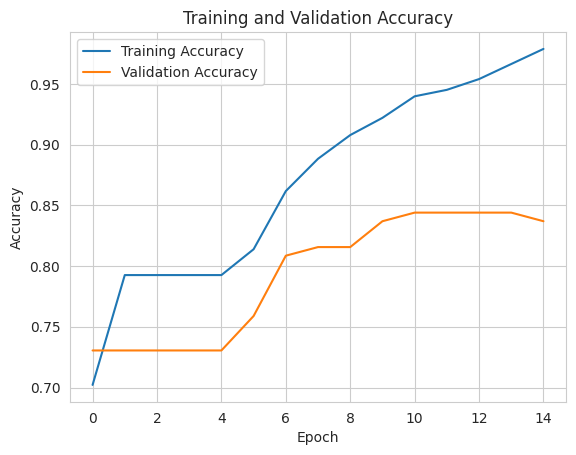

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

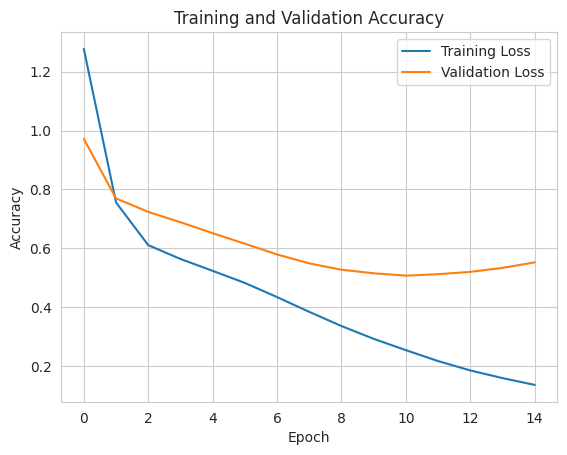

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()